# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования


Выполнили студенты гр. 2384 Федоров М.В. Муравин Е.Е. вариант №16.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


## Основные теоретические положения

### Дискретное преобразование Фурье

Рассмотрим периодический дискретный сигнал $x[n]$. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье (ДПФ):

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Численное дифференцирование (1-го порядка)
Используется формула центральной разности:
$$y_n = \frac{s_{n+1} - s_{n-1}}{2}$$
Это нерекурсивный фильтр.

**Передаточная функция:**
$$H(\omega) = i \sin(\omega)$$

### Полиномиальные фильтры скользящего среднего
Нерекурсивный фильтр определяется как:
$$y_n = \sum_{k=0}^M c_k s_{n-k}$$

* Для 5 точек ($h=2$):
$$y_n = \frac{1}{5}(s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2})$$
* Для 9 точек ($h=4$):
$$y_n = \frac{1}{9}(s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})$$

Передаточная функция для полинома первой степени имеет вид:
$$\tilde{H}_{2h+1}(f) = \frac{1}{2h+1} \cdot \frac{\sin(2\pi f(h + \frac{1}{2}))}{\sin(\pi f)}$$


### Численное интегрирование
Это рекурсивные фильтры, работающие как фильтры нижних частот.

* **Формула прямоугольников:**
    $$y_{n+1} = y_n + s_{n+1/2}$$
    **Передаточная функция:**
    $$H(\omega) = \frac{1}{2i\sin(\omega/2)}$$

* **Формула трапеций:**
    $$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$$
    **Передаточная функция:**
    $$H(\omega) = \frac{\cos(\omega/2)}{2i\sin(\omega/2)}$$

* **Формула Симпсона:**
    $$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$$
    **Передаточная функция:**
    $$H(\omega) = \frac{2 + \cos(\omega)}{3i\sin(\omega)}$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 32
T = 1

np.random.seed(16)

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

In [2]:
def s(t):
    return sum((A[i] * np.cos(w[i] * t + phi[i]) for i in range(n)))

n = 11

w = np.arange(0, n) * 0.1 * np.pi

A = np.random.randint(1, 12, size=n)
A = A  / np.sum(A)

phi = np.random.uniform(0, 0.5, size=n)

X_n = [*range(N)]
X_t = np.linspace(0, N - 1, 1000)

S_n = [s(x) for x in X_n]
S_t = [s(x) for x in X_t]

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

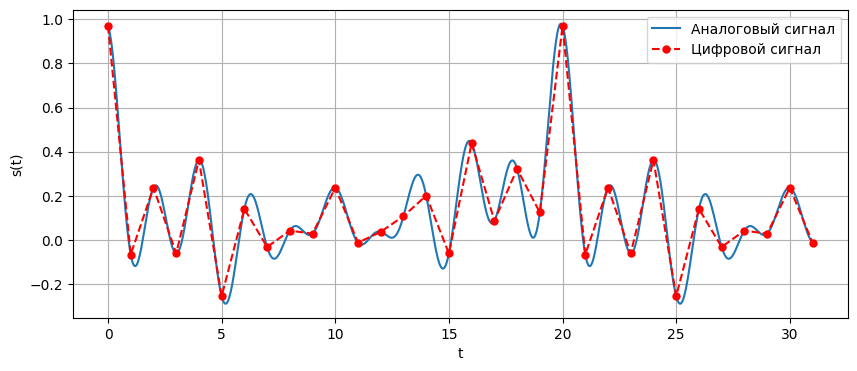

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(X_t, S_t, label='Аналоговый сигнал')
plt.plot(X_n, S_n, 'o--', c='r', markersize=5, label='Цифровой сигнал')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()
plt.grid(True)
plt.show()

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


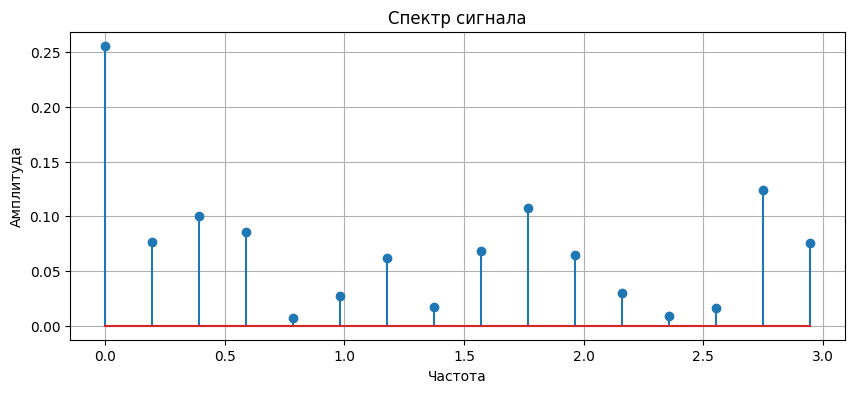

In [4]:
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S_t, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.title('Спектр сигнала')
plt.grid(True)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.stem(W, [abs(f) for f in F])
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $2h+1$ точкам:
$$y_n=\frac1{2h+1}\sum^{k=n+h}_{k=n-h}s_k$$

Передаточная функция симметричного фильтра:
$$H(\omega) = \frac{1}{2h+1}(1 + 2\sum_{k=1}^{m} \cos(k\omega))$$

In [5]:
def L(n, S):
    m = (n - 1) // 2
    y = [np.sum(S[i - m: i + m + 1]) / n for i in range(m, len(S) - m)]
    return np.array([0] * m + y + [0] * m)

Y_L_5 = L(5, S_n)
Y_L_9 = L(9, S_n)

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

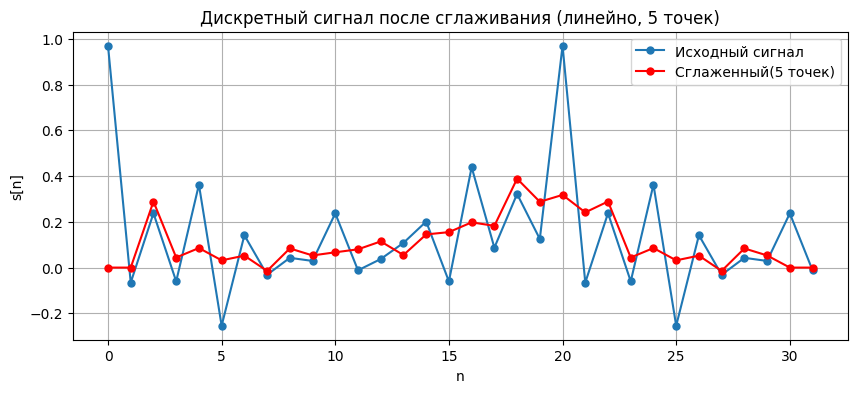

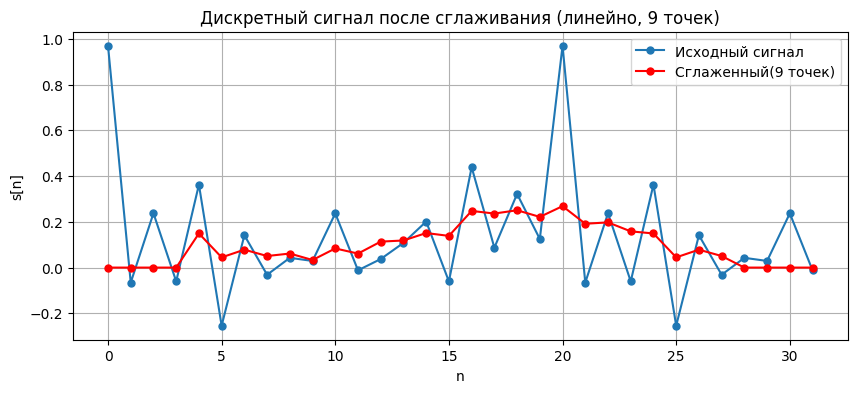

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_L_5, 'o-', color='r', label='Сглаженный(5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после сглаживания (линейно, 5 точек)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, Y_L_9, 'o-', color='r', label='Сглаженный(9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после сглаживания (линейно, 9 точек)')
plt.grid(True)
plt.legend()
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

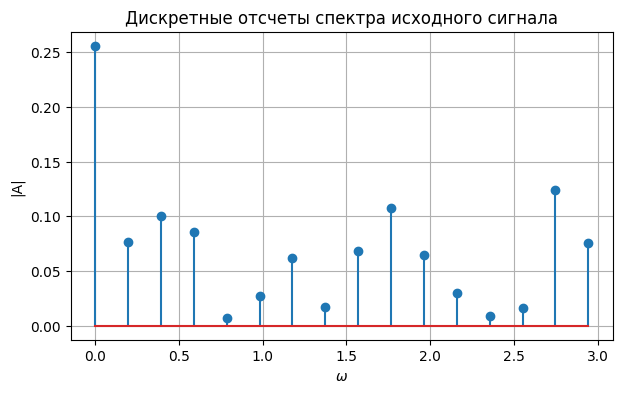

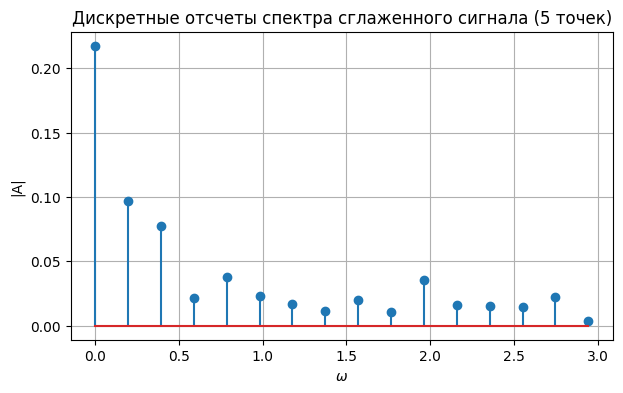

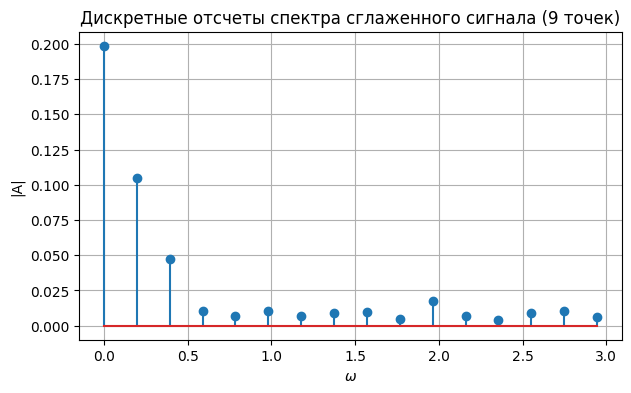

In [7]:
F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

plt.figure(figsize=(7, 4))
plt.stem(W, [abs(f) for f in F])
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра исходного сигнала')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.stem(W, [abs(f) for f in F_L_5])
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра сглаженного сигнала (5 точек)')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.stem(W, [abs(f) for f in F_L_9])
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Дискретные отсчеты спектра сглаженного сигнала (9 точек)')
plt.grid(True)
plt.show()

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Применение фильтра линейного сглаживания приводит к подавлению высокочастотных компонент сигнала, что является характерным признаком фильтра нижних частот.

Сравнение работы фильтра с разными размерами окна подтверждает эту зависимость:

- Сглаживание по 5 точкам обеспечивает более широкую полосу пропускания. Высокочастотные гармоники ослабляются, но не исчезают полностью, что сохраняет большую детальность сигнала.

- Сглаживание по 9 точкам демонстрирует более узкую полосу пропускания. Подавление высоких частот становится значительно сильнее, что приводит к более агрессивному сглаживанию и потере деталей.

Наблюдаемое изменение спектра сигнала полностью согласуется с теоретической частотной характеристикой $H(\omega)$ скользящего среднего: чем больше точек в окне сглаживания, тем уже становится полоса пропускания и тем сильнее фильтрация.

### Задание 8

Повторить п. 4-7 для следующих фильтров:

    Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    
    Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).


## Численное дифференцирование 1-го порядка.

Разностное уравнение:


$$y[n] = \frac{x[n+1] - x[n-1]}{2}$$

Частотная характеристика $H(\omega)$:
$$H(\omega) = i\sin(\omega)$$

In [8]:
k = [-0.5, 0.0, 0.5]

dy = np.convolve(S_n, k, mode='same')

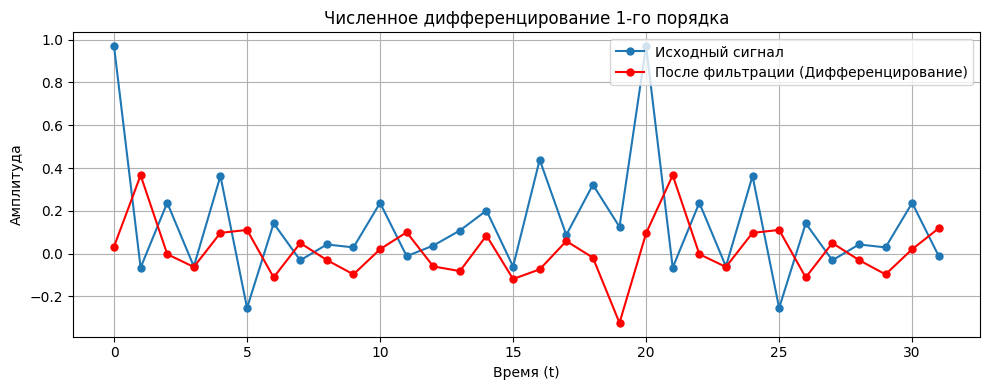

In [9]:
plt.figure(figsize=(10, 4))

plt.title('Численное дифференцирование 1-го порядка')

plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, dy, 'o-', color='r', label='После фильтрации (Дифференцирование)', markersize=5)

plt.xlabel('Время (t)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

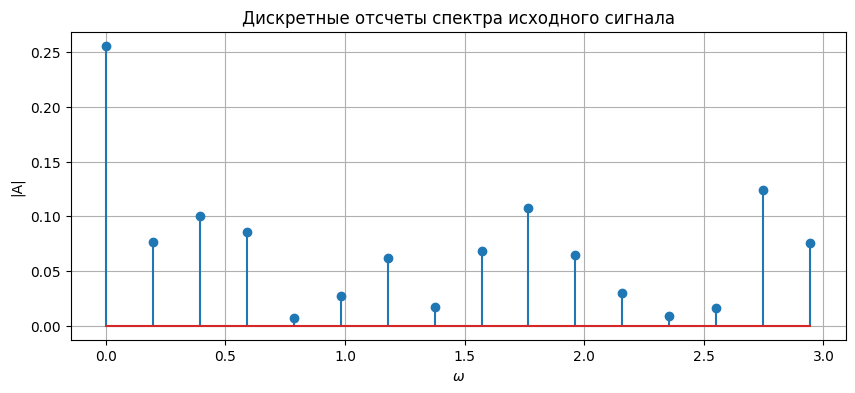

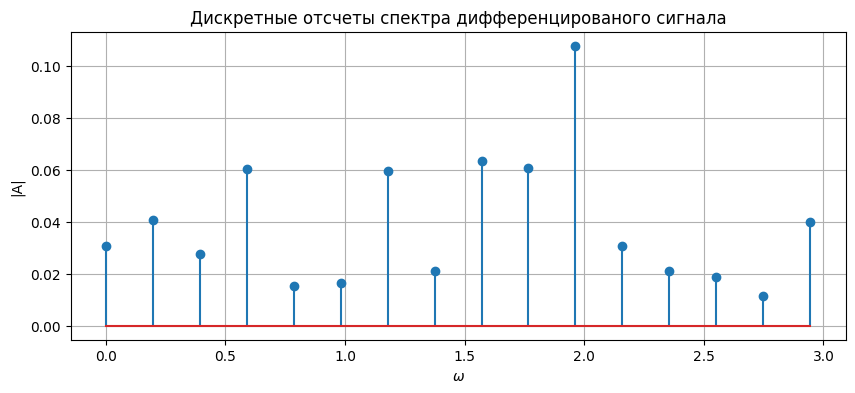

In [10]:
F_dy = np.fft.fft(dy, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.title('Дискретные отсчеты спектра исходного сигнала')
plt.stem(W, np.abs(F))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Дискретные отсчеты спектра дифференцированого сигнала')
plt.stem(W, np.abs(F_dy))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

**Анализ результатов фильтрации (Численное дифференцирование 1-го порядка)**

Частотная характеристика фильтра: $H(\omega) = i \sin(\omega)$, $|H(\omega)| = |\sin(\omega)|$.

- Нулевая частота: $|H(0)|=0$ — постоянная составляющая полностью подавлена.

- Рабочий диапазон: АЧХ $|\sin(\omega)|$ ведёт себя как ФВЧ: ослабляет низкие и усиливает высокие частоты. Для малых $\omega$ характеристика линейна ($\sim\omega$), что соответствует идеальному дифференциатору.

Фильтр корректно выполняет дифференцирование, работая как фильтр высоких частот и подчёркивая быстрые изменения сигнала.

## Дискретные фильтры численного интегрирования

Формула прямоугольников:

$$y_{n+1} = y_n + s_{n+1/2}$$

Передаточная функция:

$$H(\omega) = \frac{1}{2i\sin(\omega/2)}$$

------------------------------------------------------------

Формула трапеций:
    
$$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$$

Передаточная функция:
    
$$H(\omega) = \frac{\cos(\omega/2)}{2i\sin(\omega/2)}$$

------------------------------------------------------------

Формула Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$$
    
Передаточная функция:
    
$$H(\omega) = \frac{2 + \cos(\omega)}{3i\sin(\omega)}$$

In [11]:
from scipy.signal import lfilter

# H(z) = 1 / (1 - z^-1)
y_rect = lfilter([1.0], [1.0, -1.0], S_n)

# H(z) = 0.5 * (1 + z^-1) / (1 - z^-1)
y_trap = lfilter([0.5, 0.5], [1.0, -1.0], S_n)

# H(z) = (1/3)*(1 + 4z^-1 + z^-2) / (1 - z^-2)
y_simp = lfilter([1/3, 4/3, 1/3], [1.0, 0.0, -1.0], S_n)

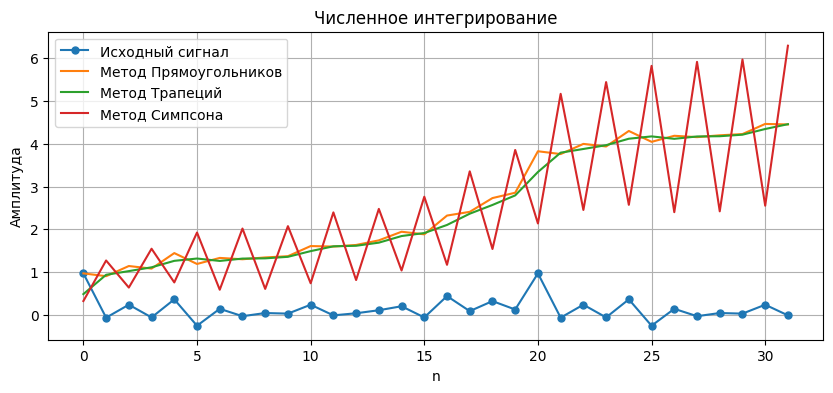

In [12]:
plt.figure(figsize=(10, 4))
plt.title('Численное интегрирование')
plt.plot(X_n, S_n, 'o-', label='Исходный сигнал', markersize=5)
plt.plot(X_n, y_rect, label='Метод Прямоугольников', markersize=5)
plt.plot(X_n, y_trap, label='Метод Трапеций', markersize=5)
plt.plot(X_n, y_simp, label='Метод Симпсона', markersize=5)
plt.xlabel('n')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()
plt.show()

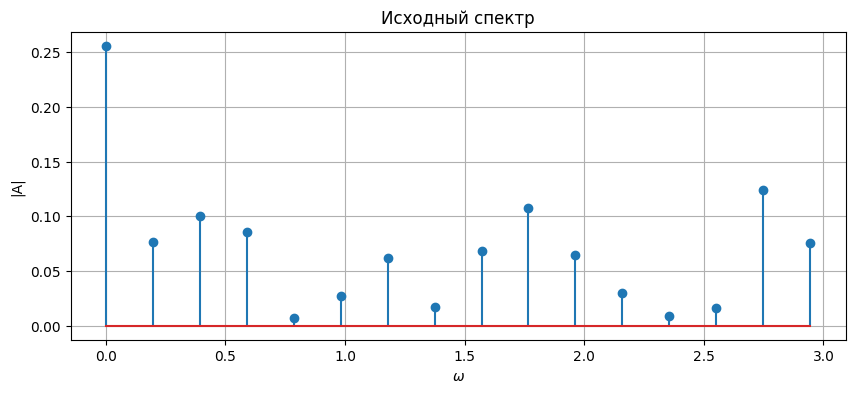

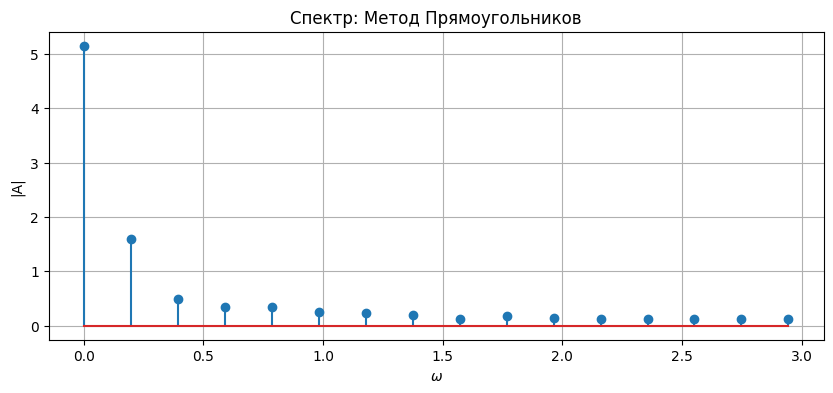

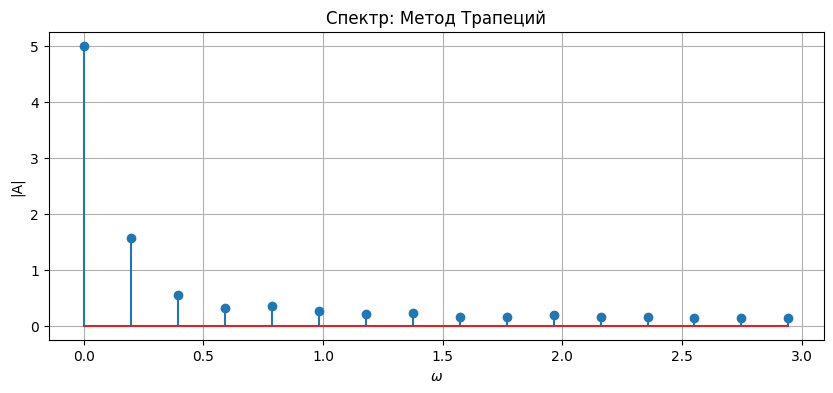

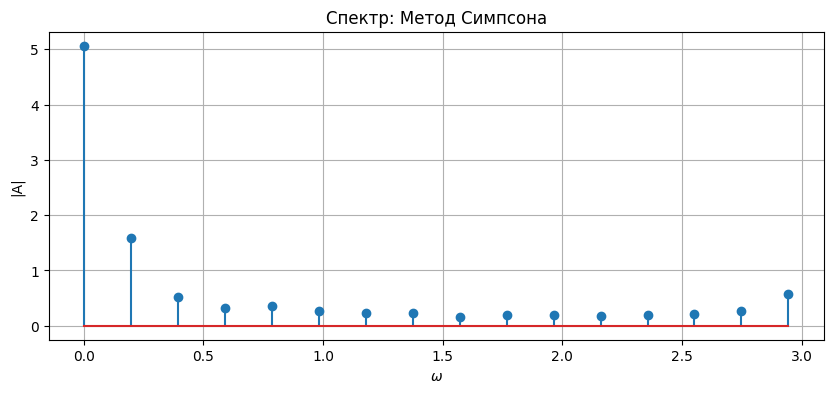

In [13]:
F_rect = np.fft.fft(y_rect, norm='forward')[:N // 2] * 2
F_trap = np.fft.fft(y_trap, norm='forward')[:N // 2] * 2
F_simp = np.fft.fft(y_simp, norm='forward')[:N // 2] * 2

plt.figure(figsize=(10, 4))
plt.title('Исходный спектр')
plt.stem(W, np.abs(F))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Спектр: Метод Прямоугольников')
plt.stem(W, np.abs(F_rect))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Спектр: Метод Трапеций')
plt.stem(W, np.abs(F_trap))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.title('Спектр: Метод Симпсона')
plt.stem(W, np.abs(F_simp))
plt.xlabel(r'$\omega$')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

Спектральный анализ результатов численного интегрирования (методы прямоугольников, трапеций и Симпсона) подтверждает соответствие их передаточных функций $H(\omega)$ теоретической модели.

1. Характер фильтрации
Все три метода реализуют фильтр нижних частот (ФНЧ). Передаточные функции имеют общий вид дроби с синусоидальной зависимостью от частоты в знаменателе. С ростом частоты $|H(\omega)|$ монотонно уменьшается, что визуально отражается на спектрах: низкочастотные составляющие сохраняют значительную амплитуду, тогда как высокочастотные эффективно подавляются.

2. Особенность на постоянной составляющей
При $\omega \to 0$ знаменатели ($\sin(\omega) \to 0$), что приводит к теоретическому бесконечному усилению $|H(0)| \to \infty$. Это соответствует физической природе интегрирования: интеграл от постоянного сигнала неограниченно возрастает. На графиках данное свойство проявляется в виде выраженного пика в нулевой точке спектра.

3. Фазовые характеристики
Наличие мнимой единицы $i$ в знаменателе ($1/i = -i$) указывает на вносимый фильтром фазовый сдвиг $-\pi/2$. Данный вывод подтверждается анализом временных реализаций: синусоидальный сигнал после интегрирования преобразуется в (минус) косинусоидальный.

Все рассмотренные методы численного интегрирования корректно воспроизводят ключевые свойства аналогового интегратора: ФНЧ-характеристику, бесконечный коэффициент передачи на нулевой частоте и фазовый сдвиг $-\pi/2$. Различия между методами проявляются в точности аппроксимации амплитудно-частотной характеристики на повышенных частотах, однако качественное поведение фильтра остается неизменным и соответствует теоретическим ожиданиям.

### Задание 9
Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

#### Заключение и выводы по проделанной работе

В ходе лабораторной работы были выполнены следующие этапы: генерация и дискретизация многокомпонентного сигнала, анализ его спектра методом ДПФ и исследование влияния на него цифровых фильтров, реализующих базовые математические операции.

**Основные выводы:**

- Фильтр скользящего среднего (линейное сглаживание) проявил свойства фильтра нижних частот (ФНЧ). Экспериментально подтверждена зависимость его полосы пропускания от ширины окна: увеличение окна (с 5 до 9 точек) приводит к более эффективному подавлению высокочастотных шумов, но одновременно вызывает усиление амплитудных искажений краев полезного сигнала, что является компромиссом при выборе параметра.

- Фильтр численного дифференцирования продемонстрировал характеристику фильтра высоких частот (ФВЧ). Его передаточная функция вида $H(\omega) = i\sin(\omega)$ подтверждает подавление постоянной составляющей и низких частот при усилении высокочастотных компонент. На практике это приводит к подчеркиванию фронтов сигнала и сдвигу его фазы на $\pi/2$, что визуально проявляется как преобразование синусоиды в косинусоиду.

- Фильтры численного интегрирования (методы прямоугольников, трапеций и Симпсона) реализуют операцию фильтра нижних частот (ФНЧ). Их ключевой особенностью является наличие полюса на нулевой частоте ($|H(0)| \to \infty$), что соответствует физическому принципу накопления (неограниченному росту интеграла от постоянной составляющей). Фильтр обеспечивает фазовый сдвиг на $-\pi/2$.

Все исследованные алгоритмы корректно реализуют соответствующие математические операции в частотной области, выступая в роли фильтров с предсказуемыми амплитудно-частотными и фазо-частотными характеристиками, что и было подтверждено экспериментально.